In [1]:
import sys
import json  
import os
current_path = os.getcwd()
data_folder = os.path.abspath(os.path.join(current_path, '..', 'data', 'external'))
data_filepath = os.path.join(data_folder, 'customer_segmentation.csv')

In [2]:
sys.path.append(os.path.abspath(os.path.join(current_path, '..')))

from src.data_preparation.cleaning import *
from src.data_preparation.rfm import *

######################################################
from src.clustering.kmeans.analysis import * 
from src.clustering.kmeans.core import *

######################################################
from src.clustering.agglomerative.analysis import *
from src.clustering.agglomerative.core import *
######################################################
from src.clustering.pca_methods.core import *
from src.clustering.pca_methods.insights import *
######################################################
from src.clustering.spectral.analysis import *
from src.clustering.spectral.core import *
######################################################
from src.descriptive_stats.insights import *
from src.descriptive_stats.stats import *
######################################################
from src.dimensionality_reduction.comparison import *
from src.dimensionality_reduction.pca import *
######################################################
from src.visualization.clustering_visualization import *
from src.visualization.data_visualization import *
###################################################### will be tested after 
from src.data_preparation.encoding import *
######################################################
from src.clustering.performance import *






Testing:

2023-12-03 17:18:10,379 - INFO - Preparing data...
2023-12-03 17:18:10,607 - INFO - Data prepared successfully.
2023-12-03 17:18:10,607 - INFO - Dropping customer id...
2023-12-03 17:18:10,631 - INFO - Customer id dropped successfully.
2023-12-03 17:18:10,631 - INFO - Cleaning data...
2023-12-03 17:18:10,650 - INFO - Data cleaned successfully.
2023-12-03 17:18:10,650 - INFO - Getting DataFrame...
2023-12-03 17:18:10,650 - INFO - Saving DataFrame to CSV...
2023-12-03 17:18:10,673 - INFO - DataFrame saved successfully.
2023-12-03 17:18:10,673 - INFO - Computing frequencies.
2023-12-03 17:18:10,686 - INFO - Computing monetary values.
2023-12-03 17:18:10,694 - INFO - Computing recency.
2023-12-03 17:18:10,703 - INFO - Concatenating recency, monetary, and frequencies dataframes.
2023-12-03 17:18:10,710 - INFO - Dataframes concatenated successfully.
2023-12-03 17:18:10,710 - INFO - Starting describe_dataset function...
2023-12-03 17:18:10,724 - INFO - 
           Recency  Monetary value    F

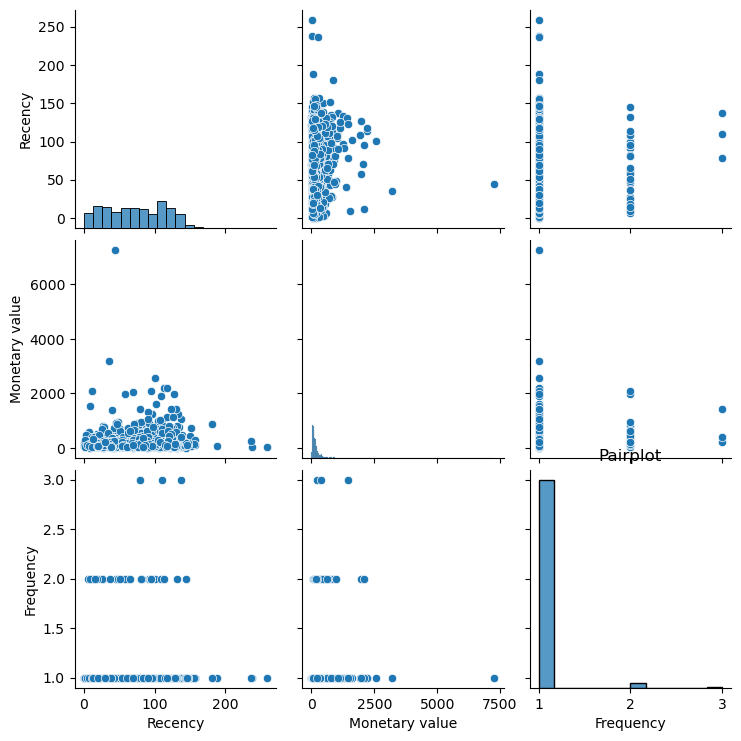

2023-12-03 17:18:13,255 - INFO - Saving plot...


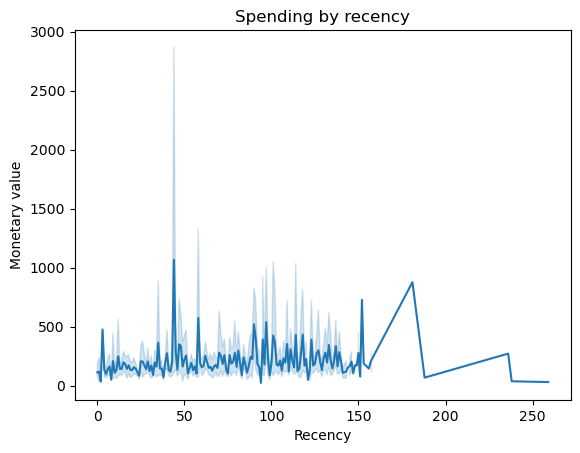

2023-12-03 17:18:16,656 - INFO - Saving plot...


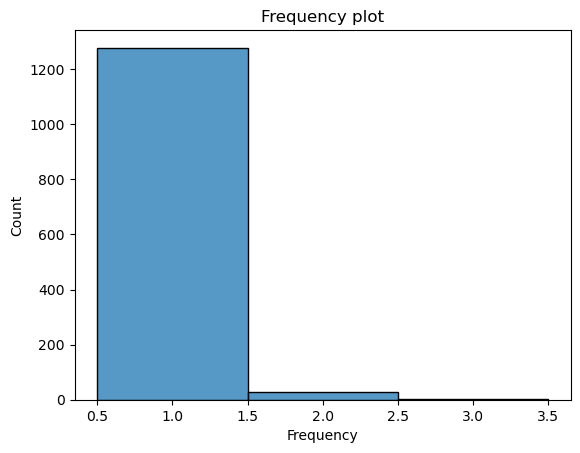

2023-12-03 17:18:16,870 - INFO - Saving plot...
2023-12-03 17:18:16,890 - INFO - Data visualization complete.
2023-12-03 17:18:16,890 - INFO - Plotting average spending by frequency...


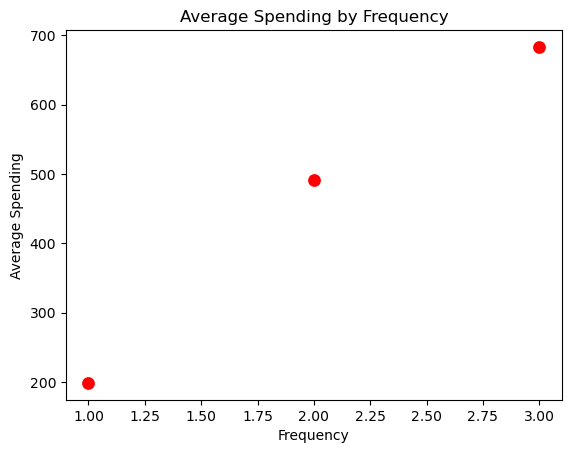

2023-12-03 17:18:17,090 - INFO - Average spending by frequency plotted.
2023-12-03 17:18:17,090 - INFO - Saving plot...
2023-12-03 17:18:17,106 - INFO - Plotting payment value distribution...
c:\Users\39339\Documents\University materials\University materials\Erasmus IE\DevOps\Devops_Project\Customer_Segmentation_DevOps\src\visualization\data_visualization.py:114: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_dataset['Monetary value'], kde=False, bins=newbins)


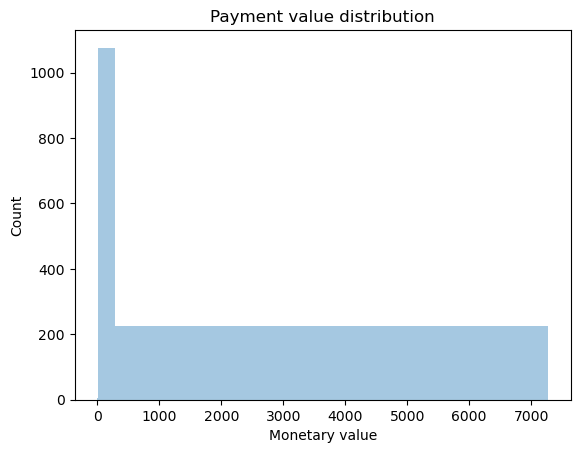

2023-12-03 17:18:17,328 - INFO - Payment value distribution plotted.
2023-12-03 17:18:17,328 - INFO - Saving plot...
2023-12-03 17:18:17,341 - INFO - Generating frequency plots...


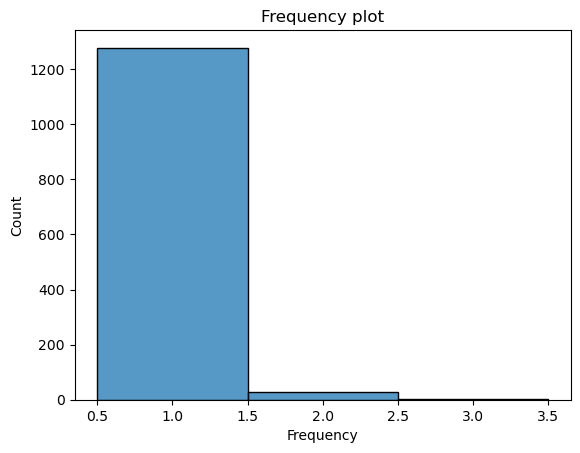

2023-12-03 17:18:17,536 - INFO - Frequency plots generated.
2023-12-03 17:18:17,536 - INFO - Generating pairplot...


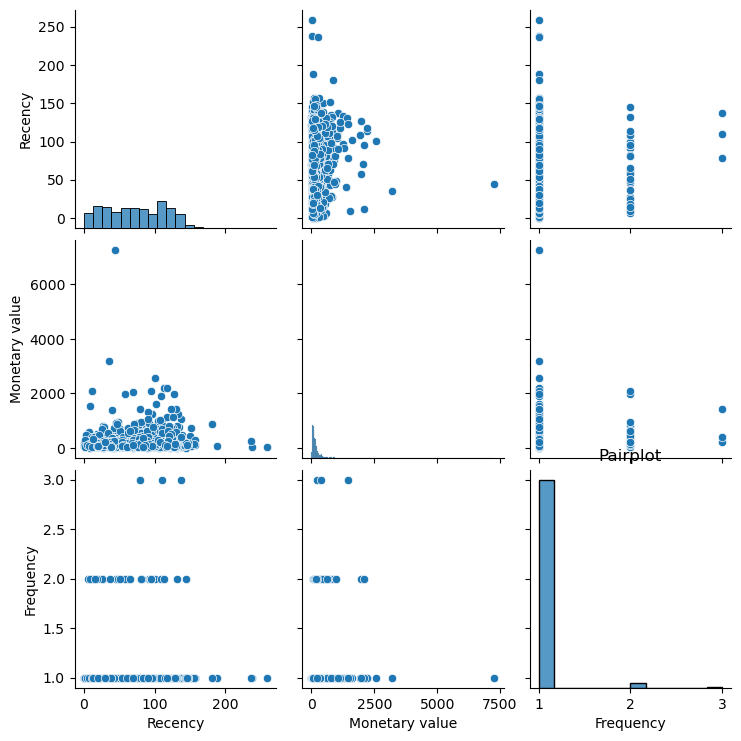

2023-12-03 17:18:19,856 - INFO - Pairplot generated.
2023-12-03 17:18:19,865 - INFO - Generating spending by recency plot...


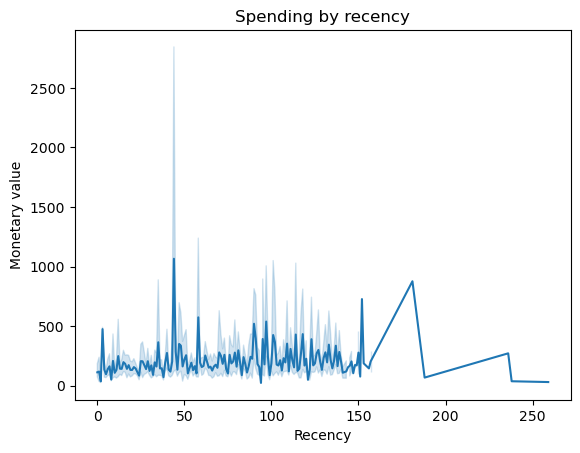

2023-12-03 17:18:23,344 - INFO - Spending by recency plotted.
2023-12-03 17:18:23,344 - INFO - Plotting payments distribution...


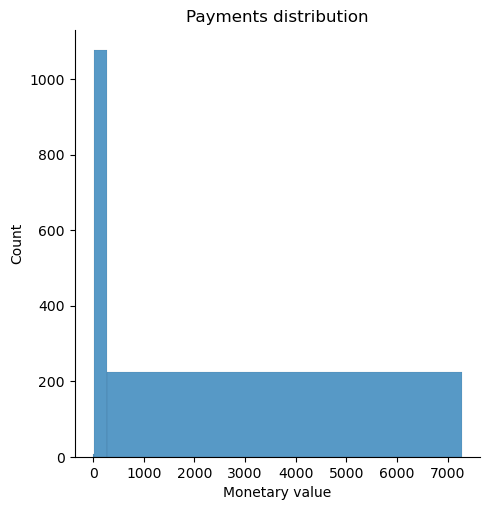

2023-12-03 17:18:23,692 - INFO - Payments distribution plotted.
2023-12-03 17:18:23,692 - INFO - Starting Elbow Method
c:\Users\39339\anaconda3\envs\devops_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\39339\anaconda3\envs\devops_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\39339\anaconda3\envs\devops_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users

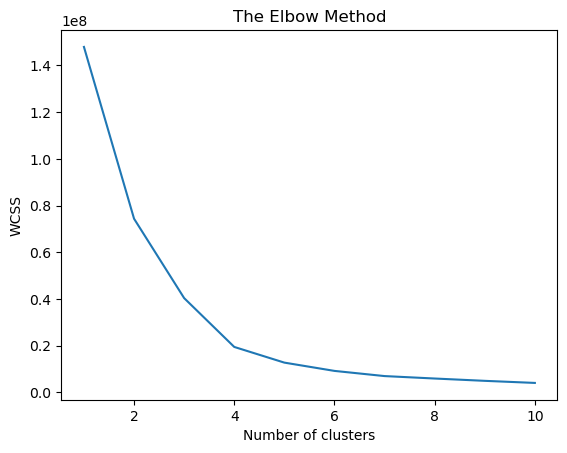

2023-12-03 17:18:26,197 - INFO - Elbow Method completed
2023-12-03 17:18:26,197 - INFO - Starting GridSearchCV for KMeans parameters
2023-12-03 17:19:13,531 - INFO - The top parameters to tune into Kmeans are: {'algorithm': 'lloyd', 'n_clusters': 5, 'n_init': 1}
2023-12-03 17:19:13,531 - INFO - GridSearchCV for KMeans parameters completed
2023-12-03 17:19:13,531 - INFO - Starting cluster selection
2023-12-03 17:19:25,192 - INFO - Starting clustering
2023-12-03 17:19:25,263 - INFO - Clustering completed
2023-12-03 17:19:25,263 - INFO - Cluster selection completed
2023-12-03 17:19:25,263 - INFO - Starting cluster selection
2023-12-03 17:19:30,702 - INFO - Starting clustering
2023-12-03 17:19:30,778 - INFO - Clustering completed
2023-12-03 17:19:30,778 - INFO - Cluster selection completed
2023-12-03 17:19:30,778 - INFO - Starting cluster selection
2023-12-03 17:19:35,725 - INFO - Starting clustering
2023-12-03 17:19:35,794 - INFO - Clustering completed
2023-12-03 17:19:35,794 - INFO - Clu

2023-12-03 17:19:36,137 - INFO - Cluster plotting completed.
2023-12-03 17:19:36,137 - INFO - Saving plot...
2023-12-03 17:19:36,154 - ERROR - Error saving plot.
2023-12-03 17:19:36,154 - INFO - Calculating Silhouette Score for kmeans_cluster
2023-12-03 17:19:36,196 - INFO - The silhouette score for kmeans_cluster is: 0.8197745050849317


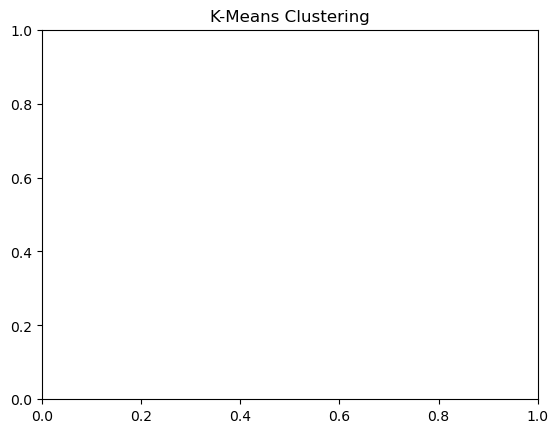

In [3]:
df = prepare_data(data_filepath)
df = drop_c_id(df)
df = clean_data(df)
get_df(df)

#RFM
frequency = get_frequencies(df)
monetary = get_monetary(df)
recency = get_recency(df)
rfm_dataset = concatenate_dataframes_(recency, monetary, frequency)


#initial stats and data visualization
describe_dataset(rfm_dataset)
#corr(rfm_dataset)
visualize_data(rfm_dataset)
plot_average_spending_by_frequency(rfm_dataset)
plot_payment_value_distribution(rfm_dataset)
freq(rfm_dataset)
pairplot(rfm_dataset)
spending_by_recency(rfm_dataset)
payments_distribution(rfm_dataset)

#kmeans
X = elbow_method(rfm_dataset)[0]
best_params = get_best_kmeans_params(X)

rfmcopy = choose(rfm_dataset,X)[0]
#number of clusters picked
nclusterskmeans = choose(rfm_dataset,X)[1]
plot_clusters(rfmcopy, clusters1=choose(rfm_dataset,X)[1])

silscores = {}
silscores['kmeans'] = silhouette_score_f(X, rfmcopy, 'kmeans_cluster')






Agglomerative and Spectral tests

2023-11-09 00:28:09,500 - INFO - Starting Dendrogram generation


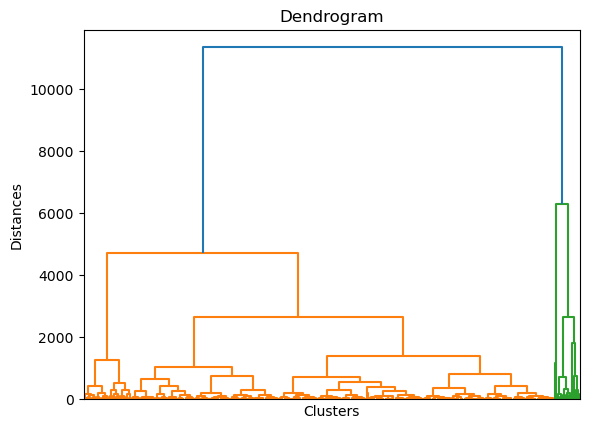

2023-11-09 00:28:11,354 - INFO - Dendrogram generation completed
2023-11-09 00:28:11,362 - INFO - Starting Agglomerative Clustering
c:\Users\39339\anaconda3\envs\devops_env\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead

2023-11-09 00:28:11,387 - INFO - Clustering completed
2023-11-09 00:28:11,395 - INFO - Plotting data for Cluster 1
2023-11-09 00:28:11,395 - INFO - Plotting data for Cluster 2
2023-11-09 00:28:11,403 - INFO - Plotting data for Cluster 3


2023-11-09 00:28:11,428 - INFO - Agglomerative Clustering completed
2023-11-09 00:28:11,428 - INFO - Starting plot_clusters function...


2023-11-09 00:28:11,479 - INFO - Cluster plotting completed.
2023-11-09 00:28:11,479 - INFO - Saving plot...
2023-11-09 00:28:11,487 - ERROR - Error saving plot.
2023-11-09 00:28:11,529 - INFO - Starting Spectral Clustering selection
2023-11-09 00:28:22,822 - INFO - Starting Spectral Clustering
2023-11-09 00:28:23,220 - INFO - Spectral Clustering completed
2023-11-09 00:28:23,228 - INFO - Starting Spectral Clustering
2023-11-09 00:28:23,620 - INFO - Spectral Clustering completed
2023-11-09 00:28:23,620 - INFO - Starting Spectral Clustering
2023-11-09 00:28:24,046 - INFO - Spectral Clustering completed
2023-11-09 00:28:24,046 - INFO - Starting visualize_spectral_clusters function...


2023-11-09 00:28:24,091 - INFO - Spectral cluster visualization completed.
2023-11-09 00:28:24,095 - INFO - Saving plot...
2023-11-09 00:28:24,104 - ERROR - Error saving plot.


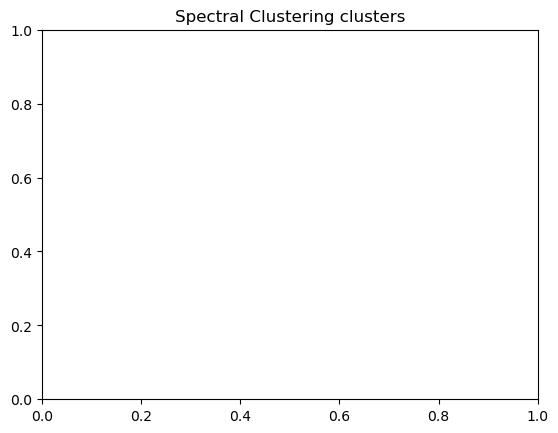

In [10]:
Dend = dendrogram(X)
y_hc = agglomerative_clustering(X, rfmcopy, nclusterskmeans)
plot_clusters(rfmcopy, clusters1= nclusterskmeans)
silscores['hierarchical clustering'] = silhouette_score(X, y_hc, metric='euclidean')
rfmcopy['hc_clusters'] = y_hc

### spectral tests
neighbors, affinity = choose_spectral()
spectral = spectral_clustering(X, nclusterskmeans, affinity, neighbors)
sp = spectral_clustering(X, nclusterskmeans, affinity, neighbors)[0]
sil_score = spectral_clustering(X, nclusterskmeans, affinity, neighbors)[1]
rfmcopy['sp_clusters'] = sp
visualize_spectral_clusters(X, sp)

silscores['Spectral clustering'] = sil_score




Clusters summary

In [11]:
rfmcopy

,Customer ID,Recency,Monetary value,Frequency,kmeans_cluster,hc_clusters,sp_clusters
0,002554bdf9eb99618d8189c3a89fdd52,15,244.08,1,0,0,1
1,00447b6bd39c4a0f6366b05948f9e2e3,64,303.79,1,0,0,1
2,0058153a752ee674162564afb1191d25,11,93.89,1,0,0,0
3,00624707c8556199de70cac1593e7088,69,149.31,1,0,0,1
4,00674fe0f6a6f190bd022dbca99795dc,114,91.35,1,0,0,0
...,...,...,...,...,...,...,...
1312,ff71a919b8cf5e0dbd3a669249448790,69,47.29,1,0,0,0
1313,ffbd58aa41cbab07f08190801e939f59,30,103.02,1,0,0,0
1314,ffdf82f47307e5b56f341a499bd268c6,122,175.50,1,0,0,1
1315,fff5169e583fd07fac9fec88962f189d,109,152.77,1,0,0,1


In [12]:
summ = cluster_summary(rfmcopy, 'Monetary value')
summ2 = cluster_summary(rfmcopy, 'Recency')
summ3 = cluster_summary(rfmcopy, 'Frequency')
print(summ)
print(summ2)
print(summ3)
print(kmeans_summary(rfmcopy, nclusterskmeans))

2023-11-09 00:28:45,866 - INFO - Input dataframe has 1317 rows and 7 columns.
2023-11-09 00:28:45,867 - INFO - Calculating summaries based on the column 'Monetary value'.
2023-11-09 00:28:45,899 - INFO - KMeans summary processed with 3 clusters.
2023-11-09 00:28:45,906 - INFO - HC summary processed with 3 clusters.
2023-11-09 00:28:45,912 - INFO - SP summary processed with 3 clusters.
2023-11-09 00:28:45,913 - INFO - Getting DataFrames...
2023-11-09 00:28:45,915 - INFO - Saving DataFrame to CSV...
2023-11-09 00:28:45,924 - INFO - DataFrame saved successfully.
2023-11-09 00:28:45,925 - INFO - Input dataframe has 1317 rows and 7 columns.
2023-11-09 00:28:45,926 - INFO - Calculating summaries based on the column 'Recency'.
2023-11-09 00:28:45,934 - INFO - KMeans summary processed with 3 clusters.
2023-11-09 00:28:45,939 - INFO - HC summary processed with 3 clusters.
2023-11-09 00:28:45,958 - INFO - SP summary processed with 3 clusters.
2023-11-09 00:28:45,970 - INFO - Getting DataFrames..

(                Clustersize  Total spending by cluster  \
kmeans_cluster                                           
0                      1193                  159034.10   
1                       114                   82134.25   
2                        10                   24932.59   

                Average spending by cluster  Average frequency by cluster  \
kmeans_cluster                                                              
0                                133.306035                      1.005029   
1                                720.475877                      1.140351   
2                               2493.259000                      1.200000   

                Frequency std  Spending sd  
kmeans_cluster                              
0                    0.070769    86.905709  
1                    0.373389   253.835378  
2                    0.421637   592.831520  ,              Clustersize  Total spending by cluster  \
hc_clusters                              

PCA and Autoencoders

2023-11-09 00:29:20,645 - INFO - Starting encoding_PCA function...
c:\Users\39339\anaconda3\envs\devops_env\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

2023-11-09 00:29:20,671 - INFO - Encoding and PCA transformation completed.
2023-11-09 00:29:20,671 - INFO - Starting PCA preprocessing...
2023-11-09 00:29:20,769 - INFO - PCA preprocessing completed.
2023-11-09 00:29:20,769 - INFO - Determining optimal number of PCA components...


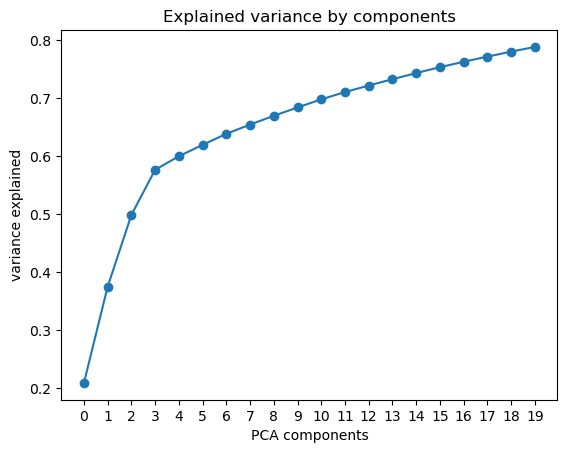

2023-11-09 00:29:21,086 - INFO - Determined optimal number of PCA components.
2023-11-09 00:29:21,086 - INFO - Performing PCA transformation...
c:\Users\39339\anaconda3\envs\devops_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\39339\anaconda3\envs\devops_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\39339\anaconda3\envs\devops_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\39339\anaconda3\envs\devops_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will

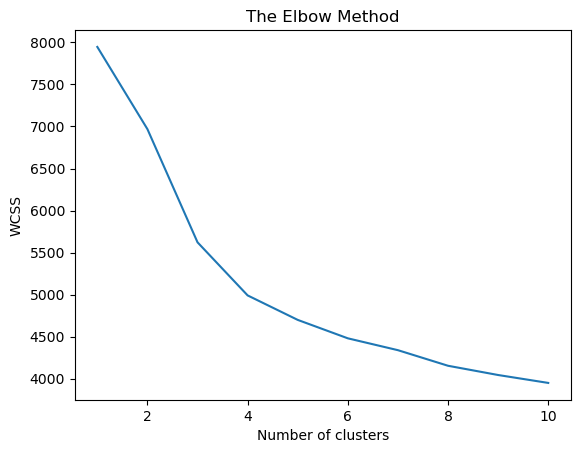

2023-11-09 00:29:24,636 - INFO - PCA transformation completed.
2023-11-09 00:29:24,636 - INFO - Starting PCA and K-Means clustering
c:\Users\39339\anaconda3\envs\devops_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



1317


2023-11-09 00:29:24,857 - INFO - PCA and K-Means clustering completed
2023-11-09 00:29:24,857 - INFO - Starting PCA components visualization


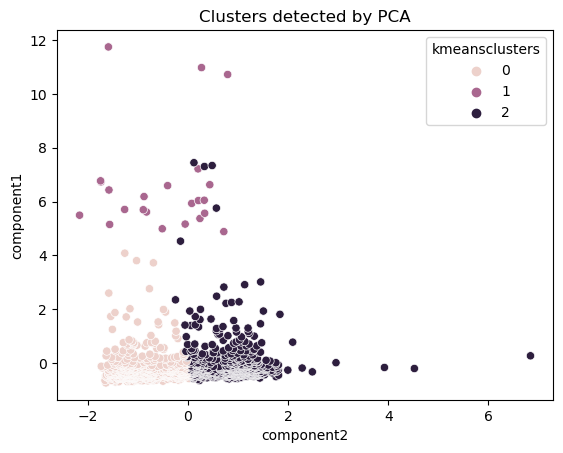

2023-11-09 00:29:25,178 - INFO - PCA components visualization completed
2023-11-09 00:29:25,221 - INFO - Starting PCA insights
2023-11-09 00:29:25,233 - INFO - Describing Cluster 0
2023-11-09 00:29:25,241 - INFO - Describing Cluster 1
2023-11-09 00:29:25,241 - INFO - Describing Cluster 2
2023-11-09 00:29:25,253 - INFO - Describing Cluster 3
2023-11-09 00:29:25,260 - INFO - PCA insights completed
2023-11-09 00:29:25,260 - INFO - Starting PCA insights 2
2023-11-09 00:29:25,579 - INFO - PCA insights 2 completed
2023-11-09 00:29:25,579 - INFO - Starting plot_clusters_pca function...


2023-11-09 00:29:25,619 - INFO - PCA cluster plotting completed.
2023-11-09 00:29:25,619 - INFO - Saving plot...
2023-11-09 00:29:25,636 - ERROR - Error saving plot.


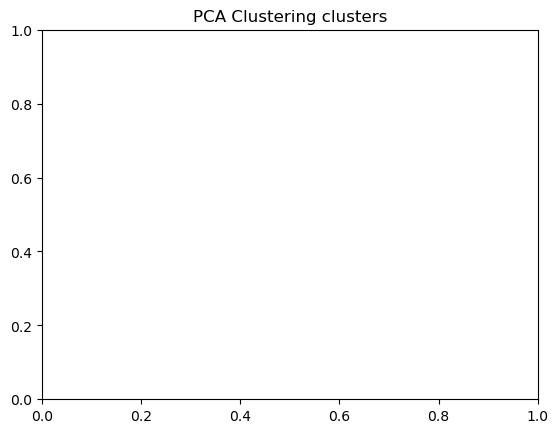

In [13]:
encode_df, newdf = encoding_PCA(df, rfm_dataset)
sc_features = pca_preprocessing(newdf)
X_ = pca_ncomponents(sc_features)
scores = pca(X_)
print(len(scores))  

segkmeans, kmeanspca = pca_kmeans(sc_features, scores, nclusterskmeans)
rfmcopy['pca_clusters'] = kmeanspca.labels_ 

dfpca = pca_components(segkmeans, kmeanspca, rfmcopy)
silscores['pca'] = silhouette_score(X_, kmeanspca.labels_ , metric='euclidean')

pca_insights(dfpca)
pca_insights2(df, dfpca)
plot_clusters_pca(dfpca, nclusterskmeans)


In [14]:
pd.DataFrame(silscores).head()
silhouette_score_df(silscores)


2023-11-09 00:29:51,502 - INFO - Getting DataFrame...
2023-11-09 00:29:51,502 - INFO - Saving DataFrame to CSV...
2023-11-09 00:29:51,502 - ERROR - Error saving DataFrame to CSV.


2023-12-03 17:30:36,906 - INFO - Starting payments_insights function...


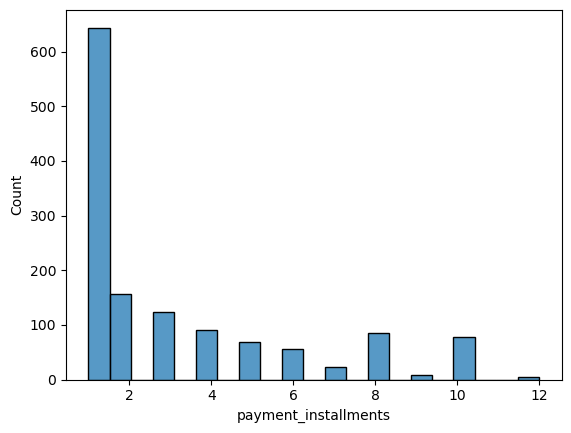

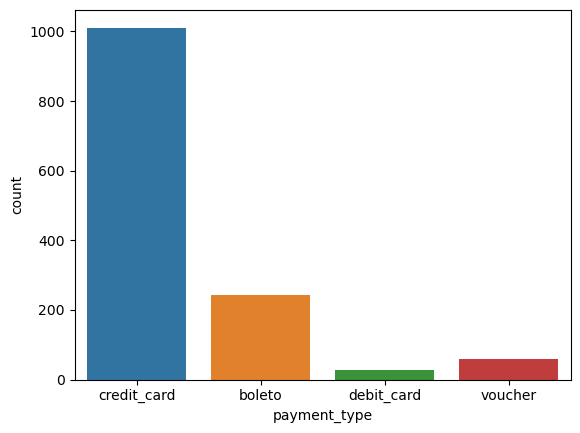

2023-12-03 17:30:37,243 - INFO - Payments insights displayed.


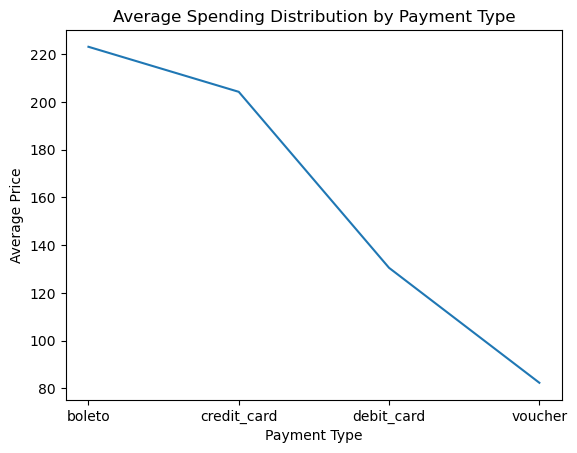

2023-12-03 17:30:37,422 - INFO - Payment insights displayed.
2023-12-03 17:30:37,422 - INFO - Getting plot...
2023-12-03 17:30:37,422 - INFO - Saving plot...
2023-12-03 17:30:37,446 - INFO - Image saved successfully.


,payment_type,Avg_Spending
0,boleto,223.007479
1,credit_card,204.153106
2,debit_card,130.475000
3,voucher,82.359000


In [5]:
payments_insights(df)

2023-12-03 17:30:16,999 - INFO - Visualizing data...


KeyboardInterrupt: 

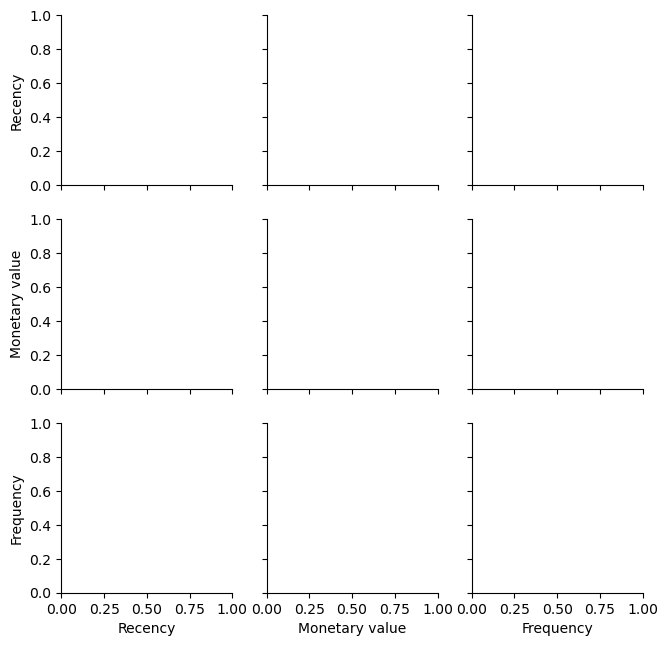

In [4]:
#visualization...
visualize_data(rfm_dataset)
plot_average_spending_by_frequency(rfm_dataset)
plot_payment_value_distribution(rfm_dataset)
segments_insights(rfmcopy, nclusterskmeans)
paydf = installments_analysis(df, rfmcopy)
customers_insights(paydf, nclusterskmeans) 
customer_geography(df)
payments_insights(df)
prod_insights(df)

In [11]:
rfmcopy

,Customer ID,Recency,Monetary value,Frequency,kmeans_cluster,hc_clusters,sp_clusters,pca_clusters
0,00674fe0f6a6f190bd022dbca99795dc,112,91.35,1,0,0,2,2
1,00f394e6fc446865ac4097b6db69ef4a,26,289.90,1,0,0,0,2
2,00f73459a4d3be97ff307dc869da0aa9,91,247.68,1,0,0,0,2
3,011b97b83f521e755f03173c96baf57b,101,92.39,1,0,0,2,2
4,011caa1d64812e93260454d6e311f330,10,142.82,1,0,0,1,2
...,...,...,...,...,...,...,...,...
1300,ff50bfb526a535449073de25d8703718,134,157.78,1,0,0,2,1
1301,ff99ec31eacd560b39d8ac9bc9b3e79d,53,71.44,1,0,0,1,0
1302,ffbd58aa41cbab07f08190801e939f59,28,103.02,1,0,0,1,1
1303,ffcdcb5ab4283658114e8077b9340a16,54,47.43,1,0,0,1,1
